# Recommended Ted Talks

In [4]:
#import libraries
#%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
 
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\d-mehr.qayyum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 1.5 MB/s eta 0:00:00


In [7]:
#Download Tedx dataset
ted_df = pd.read_csv('C:\\Users\\d-mehr.qayyum\\Downloads\\ted_main_v2.csv')
print(df.head())

       speaker_name                                              title  \
0      Alex Gendler           The Egyptian myth of the death of Osiris   
1       Shari Davis  What if you could help decide how the governme...   
2  Nita Mosby Tyler        Want a more just world? Be an unlikely ally   
3      Susan Lupack           The race to decode a mysterious language   
4     Ariel Waldman  The colorful critter world of microbes in Anta...   

  posted_date duration                                               Link  \
0    Jul 2020     3:56  https://www.ted.com/talks/alex_gendler_the_egy...   
1    Jul 2020    10:28  https://www.ted.com/talks/shari_davis_what_if_...   
2    Jul 2020    10:15  https://www.ted.com/talks/nita_mosby_tyler_wan...   
3    Jul 2020     4:24  https://www.ted.com/talks/susan_lupack_the_rac...   
4    Jul 2020     5:56  https://www.ted.com/talks/ariel_waldman_the_co...   

                                       about_speaker  \
0                                   

In [8]:
#check if there are null values present in the dataset.
ted_df.isna().sum()

speaker_name       0
title              0
posted_date        0
duration           0
Link               0
about_speaker    416
about_talk         1
views              5
tags               7
dtype: int64

In [9]:
#name of columns w/characters
ted_df.columns

Index(['speaker_name', 'title', 'posted_date', 'duration', 'Link',
       'about_speaker', 'about_talk', 'views', 'tags'],
      dtype='object')

### Note: About_Speaker data is missing in over 400 records. But it's most rich info.

* Other Dataset* 
Features Available
name: The official name of the TED Talk. Includes the title and the speaker.
title: The title of the talk
description: A blurb of what the talk is about.
main_speaker: The first named speaker of the talk.
speaker_occupation: The occupation of the main speaker.
num_speaker: The number of speakers in the talk.
duration: The duration of the talk in seconds.
event: The TED/TEDx event where the talk took place.
film_date: The Unix timestamp of the filming.
published_date: The Unix timestamp for the publication of the talk on TED.com
comments: The number of first level comments made on the talk.
tags: The themes associated with the talk.
languages: The number of languages in which the talk is available.
ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
related_talks: A list of dictionaries of recommended talks to watch next.
url: The URL of the talk.
views: The number of views on the talk.


## Process the Date Time Feature

In [10]:
#look at posted_date
ted_df['posted_date'].value_counts()

posted_date
Sep 2018    59
Oct 2019    54
Feb 2020    53
Mar 2018    52
Oct 2018    48
            ..
Aug 2016    19
Dec 2016    19
Jul 2017    17
Aug 2015    16
Nov 2014    10
Name: count, Length: 69, dtype: int64

In [12]:
splitted = ted_df['posted_date'].str.split(' ', expand=True)
 
# Creating columns for month and year of the talk
ted_df['year'] = splitted[1].astype('int')
ted_df['month'] = splitted[0]

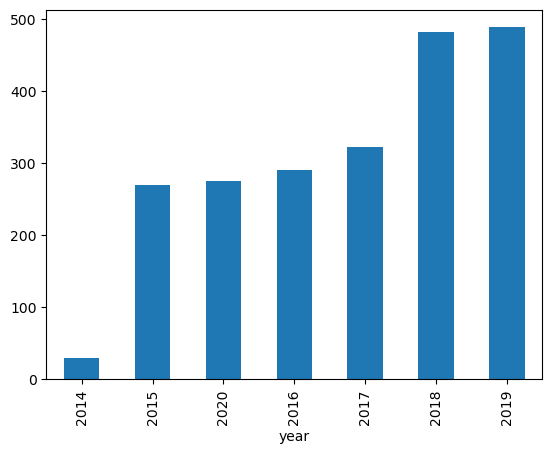

In [17]:
# trend in the number of ted talks happening yearly
ted_df['year'].value_counts(ascending=True).plot.bar()
plt.show()

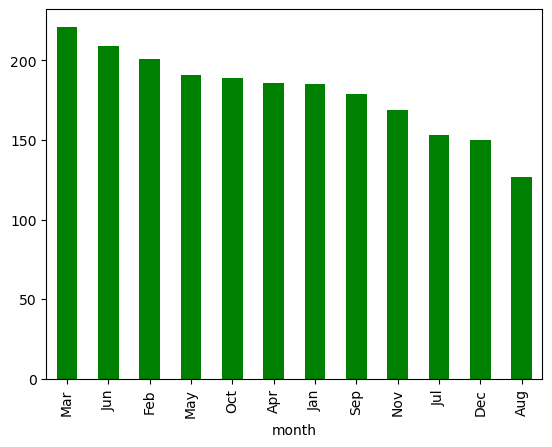

In [15]:
#Monthly trend
ted_df['month'].value_counts().plot.bar(color='green')
plt.show()

In [25]:
# Let's combine the title and the details of the talk.
ted_df['details_talk'] = ted_df['title'] + ' ' + ted_df['about_talk'] + ' ' + ted_df['speaker_name']
#Show sample of 5 listings
ted_df['details_talk'].head(5)

0    The Egyptian myth of the death of Osiris Long ...
1    What if you could help decide how the governme...
2    Want a more just world? Be an unlikely ally A ...
3    The race to decode a mysterious language In th...
4    The colorful critter world of microbes in Anta...
Name: details_talk, dtype: object

In [26]:
# Removing the unnecessary information #speaker_name
ted_df_without_name = ted_df[['speaker_name', 'details_talk']]
ted_df_without_name.dropna(inplace = True)
ted_df_without_name.head()

,speaker_name,details_talk
0,Alex Gendler,The Egyptian myth of the death of Osiris Long ...
1,Shari Davis,What if you could help decide how the governme...
2,Nita Mosby Tyler,Want a more just world? Be an unlikely ally A ...
3,Susan Lupack,The race to decode a mysterious language In th...
4,Ariel Waldman,The colorful critter world of microbes in Anta...


## Process for NLP

In [29]:
#remove any punctuations present in the ted_df['details_talk']

#clean of nan before processing
ted_df['details_talk']=ted_df['details_talk'].astype(str)

#create list
punctuations_list = string.punctuation
 
def clean_punctuations(text):
    signal = str.maketrans('', '', punctuations_list)
    return text.translate(signal)
 
 
ted_df['details_talk'] = ted_df['details_talk'].apply(lambda x: clean_punctuations(x))

#see all ted_df but w/processed column from lambda function
ted_df.head()

,speaker_name,title,posted_date,duration,Link,about_speaker,about_talk,views,tags,year,month,details_talk
0,Alex Gendler,The Egyptian myth of the death of Osiris,Jul 2020,3:56,https://www.ted.com/talks/alex_gendler_the_egy...,NaN,"Long jealous of his older brother Osiris, the ...","208,703","education,ancient world,TED-Ed",2020,Jul,The Egyptian myth of the death of Osiris Long ...
1,Shari Davis,What if you could help decide how the governme...,Jul 2020,10:28,https://www.ted.com/talks/shari_davis_what_if_...,As a leader of the Participatory Budgeting Pro...,What if you could help decide how the governme...,"425,688","democracy,leadership,community",2020,Jul,What if you could help decide how the governme...
2,Nita Mosby Tyler,Want a more just world? Be an unlikely ally,Jul 2020,10:15,https://www.ted.com/talks/nita_mosby_tyler_wan...,Nita Mosby Tyler specializes in the developmen...,A more equal world starts with you. Citing a f...,"460,269","activism,inequality,race",2020,Jul,Want a more just world Be an unlikely ally A m...
3,Susan Lupack,The race to decode a mysterious language,Jul 2020,4:24,https://www.ted.com/talks/susan_lupack_the_rac...,NaN,"In the early 1900s, archaeologist Sir Arthur E...","350,202","TED-Ed,education,language",2020,Jul,The race to decode a mysterious language In th...
4,Ariel Waldman,The colorful critter world of microbes in Anta...,Jul 2020,5:56,https://www.ted.com/talks/ariel_waldman_the_co...,"An artist who's pivoted to science, Ariel Wald...","In this tour of the microscopic world, explore...","333,482","science,animals,exploration",2020,Jul,The colorful critter world of microbes in Anta...


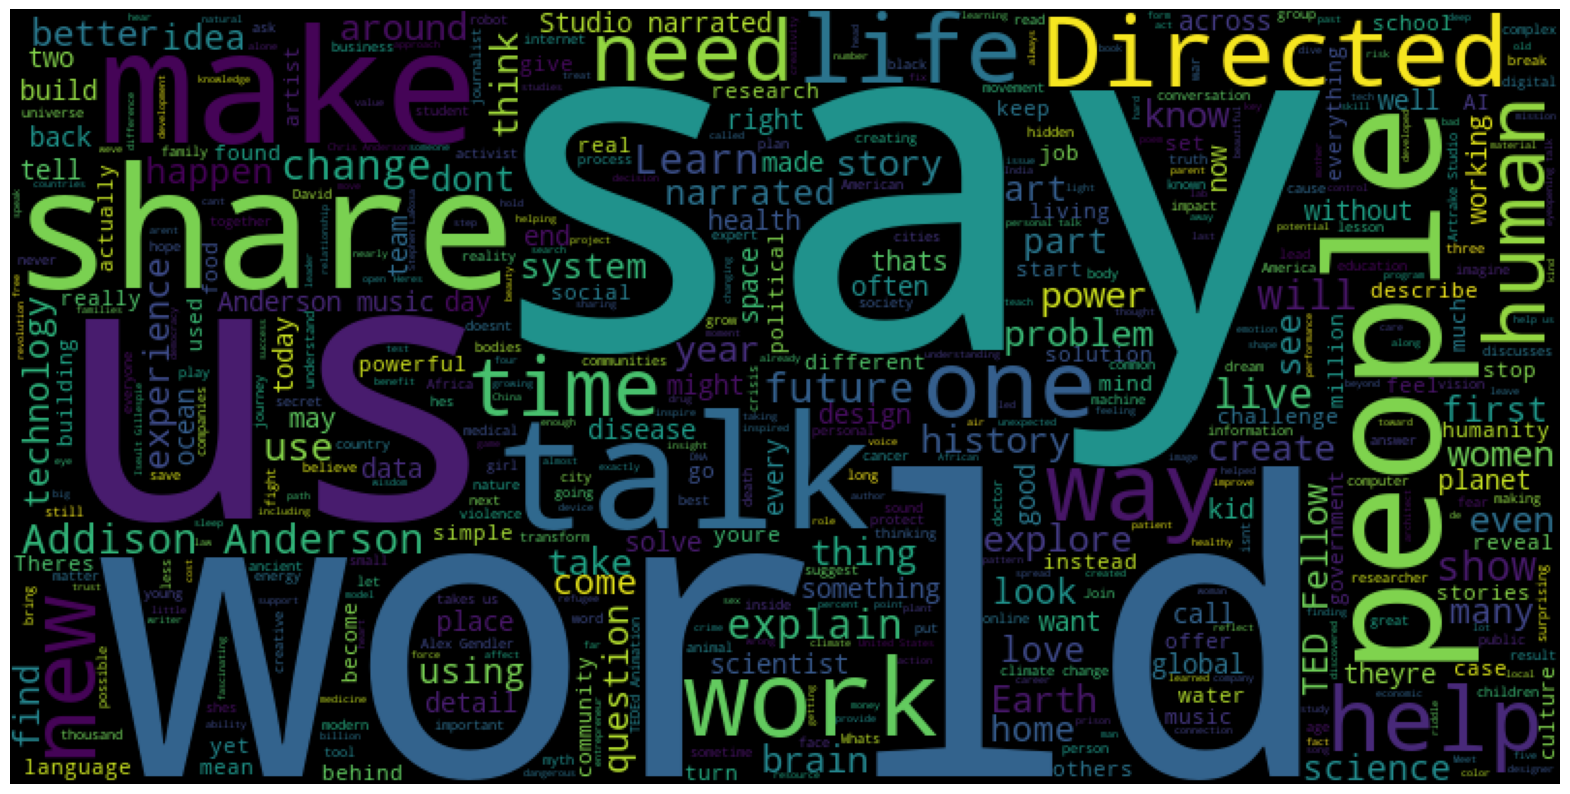

In [31]:
## Visualization of 'details_talk'
### WordCloud
details_corpus = " ".join(ted_df['details_talk'])
 
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000,
               width=800,
               height=400).generate(details_corpus)
plt.axis('off')
plt.imshow(wc)
plt.show()

## Recommender System
* Use details about the talks to build our recommender system. 
We will use the Tf-IDF vectorizer to convert textual data into their numerical representations.
* Cosine Similarity – measured the similarity between the two objects.
* Pearson Correlation – Pearson’s correlation coefficient formula is the most commonly used and the most popular formula to get the correlation coefficient.

In [32]:
#Fit the vectorizer on 'details_talk'
%%capture
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(ted_df['details_talk'])

In [33]:
#Define helper function to obtain Cosine Similarity

def get_cos_similarity(talk_content, data=ted_df):
 
    # Getting vector for the input talk_content.
    talk_array1 = vectorizer.transform(talk_content).toarray()
 
    # We will store similarity for each row of the dataset.
    similarity = []
    pearson = []
    for idx, row in data.iterrows():
        details = row['details_talk']
 
        # Getting vector for current talk.
        talk_array2 = vectorizer.transform(
            data[data['details_talk'] == details]['details_talk']).toarray()
 
        # Calculating cosine similarities
        cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]
 
        # Calculating pearson correlation
        pea_sim = pearsonr(talk_array1.squeeze(), talk_array2.squeeze())[0]
 
        similarity.append(cos_sim)
        pearson.append(pea_sim)
 
    return similarity, pearson

In [38]:
#Define Recommender Function
def mq_recommends(talk_content, data=ted_df):
 
    data['cos_sim'], data['pea_sim'] = get_cos_similarity(talk_content)  #get_similarities() replaced
 
    data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[
                     False, False], inplace=True)
 
    display(data[['speaker_name', 'details_talk']].head())

## Check Recommender System
*Which talks are recommended by the system based on the different major topics which revolve around the world?

In [39]:
#Apply recommend
talk_content = ['Time Management and working\
hard to become successful in life']
mq_recommends(talk_content)

,speaker_name,details_talk
1574,Laura Vanderkam,How to gain control of your free time There ar...
189,Fang Ruan,Management lessons from Chinese business and p...
1479,Chimamanda Ngozi Adichie,We should all be feminists We teach girls that...
1784,Knut Haanaes,Two reasons companies fail — and how to avoid ...
1994,Chip Kidd,The art of first impressions — in design and l...


### Second example
* Looking for religion and spiritual topics


In [41]:
#create new recommend with new topic
talk_content_religion = ['religion\
. How can we change this world?']
mq_recommends(talk_content_religion)

,speaker_name,details_talk
1570,Sharon Brous,Its time to reclaim religion At a moment when ...
1276,Lyra McKee,How uncomfortable conversations can save lives...
1919,Michael Green,How we can make the world a better place by 20...
774,Katharine Hayhoe,The most important thing you can do to fight c...
1892,Chelsea Shields,How Im working for change inside my church How...
